In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset1=pd.read_csv('kidney-stone-dataset.csv')
dataset1 = dataset1.drop('Unnamed: 0', axis=1)
dataset1

,gravity,ph,osmo,cond,urea,calc,target
0,1.021000,4.910000,725,14.000000,443,2.450000,0
1,1.017000,5.740000,577,20.000000,296,4.490000,0
2,1.008000,7.200000,321,14.900000,101,2.360000,0
3,1.011000,5.510000,408,12.600000,224,2.150000,0
4,1.005000,6.520000,187,7.500000,91,1.160000,0
...,...,...,...,...,...,...,...
85,1.021452,5.556081,756,24.241481,367,7.669120,1
86,1.016501,6.900257,549,20.549790,204,5.775256,1
87,1.032754,5.443491,1085,23.188653,576,8.664169,1
88,1.023870,5.106433,325,12.124689,50,0.781620,1


In [3]:
dataset2=pd.read_csv('kidney_stone_data.csv')
dataset2 = dataset2.drop('id', axis=1)
dataset2

,gravity,ph,osmo,cond,urea,calc,target
0,1.013,6.19,443,14.8,124,1.45,0
1,1.025,5.40,703,23.6,394,4.18,0
2,1.009,6.13,371,24.5,159,9.04,0
3,1.021,4.91,442,20.8,398,6.63,1
4,1.021,5.53,874,17.8,385,2.21,1
...,...,...,...,...,...,...,...
409,1.011,5.21,527,21.4,75,1.53,0
410,1.024,5.53,577,19.7,224,0.77,0
411,1.018,6.28,455,22.2,270,7.68,1
412,1.008,7.12,325,12.6,75,1.03,1


In [4]:
dataset3=pd.read_csv('kindey stone urine analysis.csv')
dataset3

,gravity,ph,osmo,cond,urea,calc,target
0,1.021,4.91,725,14.0,443,2.45,0
1,1.017,5.74,577,20.0,296,4.49,0
2,1.008,7.20,321,14.9,101,2.36,0
3,1.011,5.51,408,12.6,224,2.15,0
4,1.005,6.52,187,7.5,91,1.16,0
...,...,...,...,...,...,...,...
74,1.025,7.90,721,23.6,301,9.04,1
75,1.017,4.81,410,13.3,195,0.58,1
76,1.024,5.40,803,21.8,394,7.82,1
77,1.016,6.81,594,21.4,255,12.20,1


In [5]:
combined_df=pd.concat([dataset1, dataset2,dataset3], ignore_index=True)
df=combined_df.copy()
df

,gravity,ph,osmo,cond,urea,calc,target
0,1.021,4.91,725,14.0,443,2.45,0
1,1.017,5.74,577,20.0,296,4.49,0
2,1.008,7.20,321,14.9,101,2.36,0
3,1.011,5.51,408,12.6,224,2.15,0
4,1.005,6.52,187,7.5,91,1.16,0
...,...,...,...,...,...,...,...
578,1.025,7.90,721,23.6,301,9.04,1
579,1.017,4.81,410,13.3,195,0.58,1
580,1.024,5.40,803,21.8,394,7.82,1
581,1.016,6.81,594,21.4,255,12.20,1


In [6]:
df.shape

(583, 7)

In [7]:
df.isnull().sum()

gravity    0
ph         0
osmo       0
cond       0
urea       0
calc       0
target     0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   gravity  583 non-null    float64
 1   ph       583 non-null    float64
 2   osmo     583 non-null    int64  
 3   cond     583 non-null    float64
 4   urea     583 non-null    int64  
 5   calc     583 non-null    float64
 6   target   583 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 32.0 KB


In [9]:
df.duplicated().sum()

77

In [10]:
df = df.drop_duplicates()

In [11]:
df.duplicated().sum()

0

<Axes: xlabel='target', ylabel='count'>

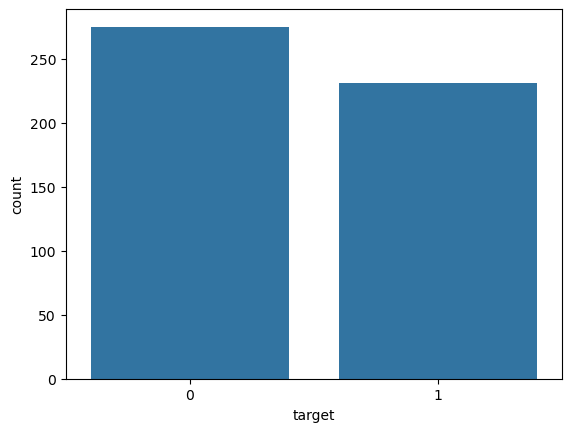

In [12]:
import seaborn as sns
sns.countplot(x='target',data=df)

<Axes: xlabel='gravity'>

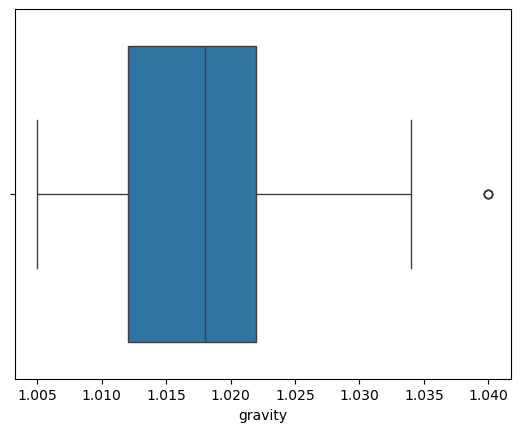

In [13]:
import seaborn as sns
sns.boxplot(data=combined_df, x='gravity')

<Axes: xlabel='ph'>

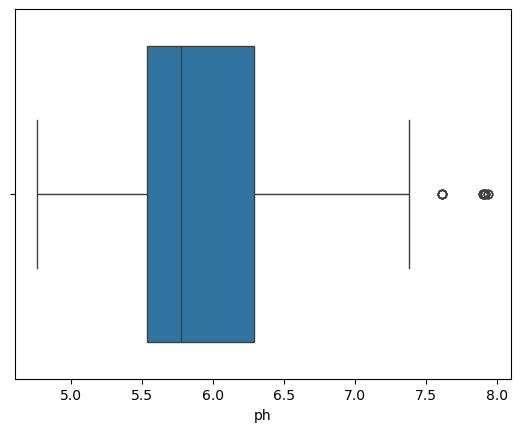

In [14]:
sns.boxplot(data=combined_df, x='ph')

<Axes: xlabel='osmo'>

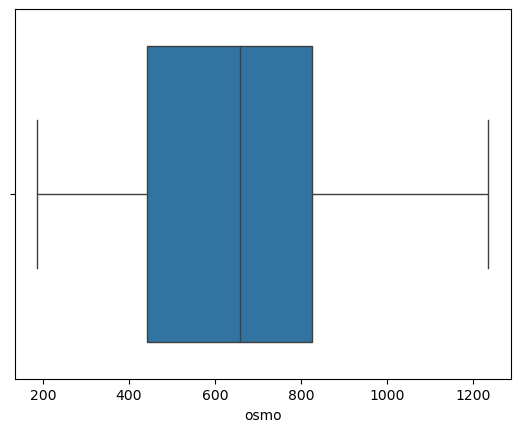

In [15]:
sns.boxplot(data=combined_df, x='osmo')

<Axes: xlabel='cond'>

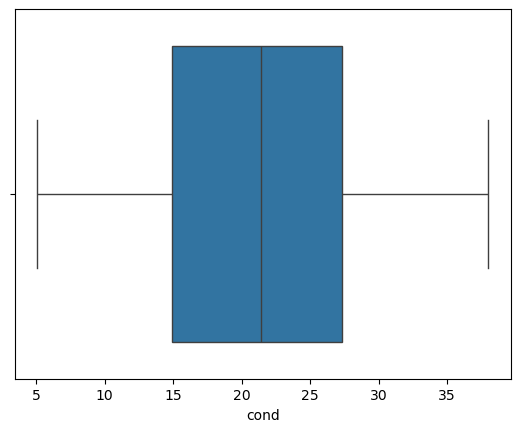

In [16]:
sns.boxplot(data=combined_df, x='cond')

<Axes: xlabel='urea'>

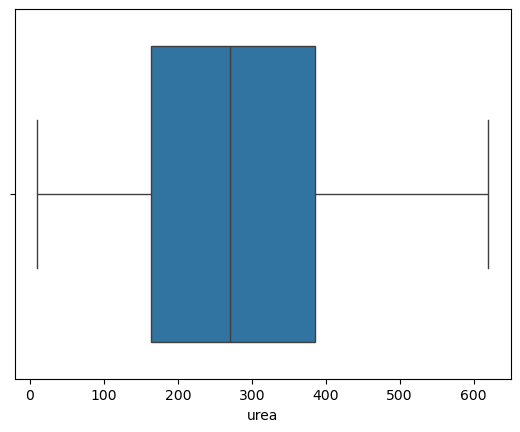

In [17]:
sns.boxplot(data=combined_df, x='urea')

<Axes: xlabel='calc'>

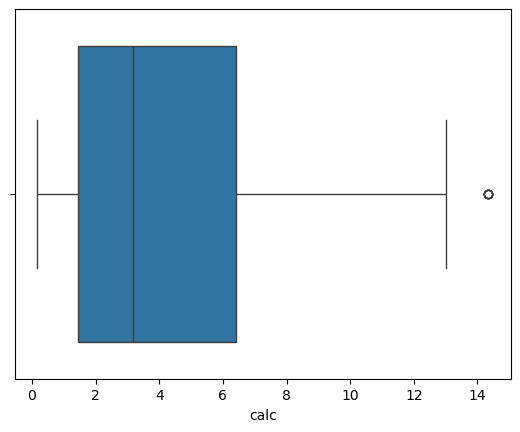

In [18]:
sns.boxplot(data=combined_df, x='calc')

# Handling outliers

In [19]:
columns = ['gravity', 'ph', 'calc']

In [20]:
for col in columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define lower and upper whisker values
    lower_whisker = Q1 - 1.5 * IQR
    upper_whisker = Q3 + 1.5 * IQR

    # Cap the outliers at the whisker values
    df[col] = np.where(df[col] < lower_whisker, lower_whisker, 
                       np.where(df[col] > upper_whisker, upper_whisker, df[col]))


C:\Users\Binisha\AppData\Local\Temp\ipykernel_13116\3935736073.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = np.where(df[col] < lower_whisker, lower_whisker,
C:\Users\Binisha\AppData\Local\Temp\ipykernel_13116\3935736073.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = np.where(df[col] < lower_whisker, lower_whisker,
C:\Users\Binisha\AppData\Local\Temp\ipykernel_13116\3935736073.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


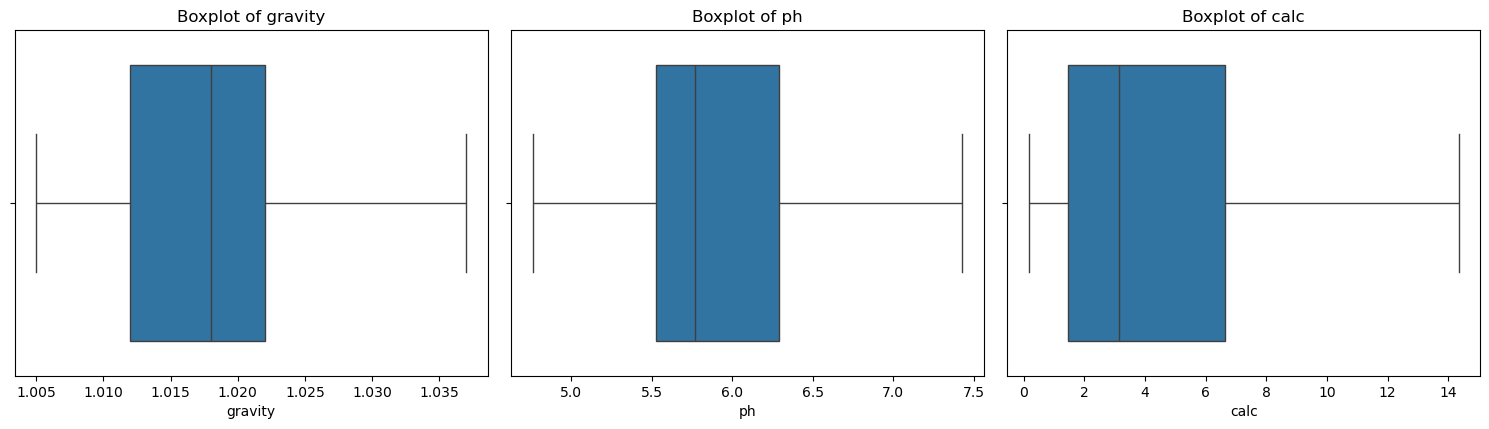

In [21]:
plt.figure(figsize=(15, 8))
for i, col in enumerate(columns, 1):
    plt.subplot(2, 3, i)  # Adjust the layout as needed
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

# model

In [22]:
from sklearn.model_selection import train_test_split
X=df.drop(['target'],axis=1)
Y=df['target']

In [23]:
X

,gravity,ph,osmo,cond,urea,calc
0,1.021,4.91,725,14.0,443,2.45
1,1.017,5.74,577,20.0,296,4.49
2,1.008,7.20,321,14.9,101,2.36
3,1.011,5.51,408,12.6,224,2.15
4,1.005,6.52,187,7.5,91,1.16
...,...,...,...,...,...,...
501,1.018,6.28,455,22.2,270,7.68
502,1.008,7.12,325,12.6,75,1.03
503,1.011,6.13,364,9.9,159,0.27
554,1.026,5.16,822,26.0,301,14.34


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Random Forest

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
class RandomForestClassifierScratch:
    def __init__(self, n_estimators=100, max_features=None, max_depth=None):
        self.n_estimators = n_estimators  # Number of trees in the forest
        self.max_features = max_features  # Max features to consider for splits
        self.max_depth = max_depth        # Max depth of each tree
        self.trees = []                   # List to hold the trees

    def _bootstrap_sample(self, X, y):
        n_samples = X.shape[0]
        # Sample with replacement
        indices = np.random.choice(n_samples, size=n_samples, replace=True)
        return X.iloc[indices], y.iloc[indices]

    def fit(self, X, y):
        # Fit multiple decision trees to create the random forest
        for _ in range(self.n_estimators):
            tree = DecisionTreeClassifier(max_features=self.max_features, max_depth=self.max_depth)
            # Bootstrap sample
            X_sample, y_sample = self._bootstrap_sample(X, y)
            tree.fit(X_sample, y_sample)
            self.trees.append(tree)

    def predict(self, X):
        # Get predictions from all trees
        tree_preds = np.zeros((X.shape[0], len(self.trees)))
        for i, tree in enumerate(self.trees):
            tree_preds[:, i] = tree.predict(X)
        # Majority voting: most common prediction from all trees
        return [np.bincount(tree_preds[i].astype(int)).argmax() for i in range(X.shape[0])]

    def predict_proba(self, X):
        # Get class probabilities from all trees
        tree_probas = np.zeros((X.shape[0], len(self.trees), len(np.unique(self.trees[0].classes_))))
        for i, tree in enumerate(self.trees):
            tree_probas[:, i, :] = tree.predict_proba(X)
        # Average probabilities across all trees
        return np.mean(tree_probas, axis=1)

    def score(self, X, y):
        # Return the accuracy of the random forest on the given dataset
        y_pred = self.predict(X)
        return accuracy_score(y, y_pred)



In [40]:
# Initialize Random Forest Classifier
rfc_scratch = RandomForestClassifierScratch(n_estimators=200, max_features="sqrt", max_depth=10)

# Train the model
rfc_scratch.fit(X_train, y_train)

# Make predictions
y_pred = rfc_scratch.predict(X_test)

# Print evaluation metrics
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

Accuracy: 0.8026315789473685
Confusion Matrix:
 [[71 14]
 [16 51]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.84      0.83        85
           1       0.78      0.76      0.77        67

    accuracy                           0.80       152
   macro avg       0.80      0.80      0.80       152
weighted avg       0.80      0.80      0.80       152



In [41]:
# random forest (collection of decision trees)
# applying random forest classifier to derive the model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report



# evaluate the performance of the model using random forest classifier
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 Score:', f1_score(y_test, y_pred))


Accuracy: 0.8026315789473685
Precision: 0.7846153846153846
Recall: 0.7611940298507462
F1 Score: 0.7727272727272727


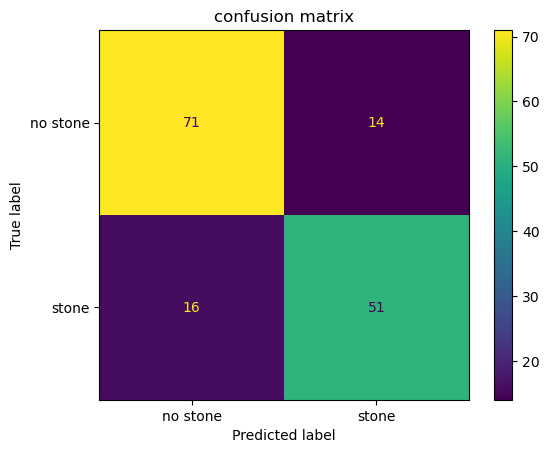

In [42]:
from sklearn.metrics import ConfusionMatrixDisplay
#confusion matrix
cm = confusion_matrix(y_test,y_pred)

#display
display = ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = ["no stone","stone"])
display.plot()
plt.title("confusion matrix")
plt.show()

In [44]:
from joblib import dump, load
# Save the best model
dump(rfc_scratch, 'random_forest03.joblib')

['random_forest03.joblib']

In [46]:
loaded_model = load('random_forest03.joblib')

In [ ]:
gravity=float(input("Enter gravity: "))
ph=float(input("Enter ph: "))
osmo=float(input("Enter osmo: "))
cond=float(input("Enter cond: "))
urea=float(input("Enter urea: "))
calc=float(input("Enter calc: "))

In [ ]:
input_data = pd.DataFrame({
        'gravity': [gravity],
       'ph': [ph],
        'osmo': [osmo],
     
        'cond': [cond],
        'urea': [urea],
        'calc': [calc]
    })

In [ ]:
prediction = loaded_model.predict(input_data)

In [ ]:
print(prediction)

In [ ]:
probability = loaded_model.predict_proba(input_data)
print(probability)

In [ ]:
probability[0][0]

'lgbm__n_estimators': [100],          # Set fixed value of 100
    'lgbm__learning_rate': [0.1],         # Fixed to 0.1 based on previous run
    'lgbm__max_depth': [7],               # Fixed to 7
    'lgbm__min_child_samples': [20],      # Fixed to 20
    'lgbm__colsample_bytree': [0.8]       # Fixed to 0.8


# input prediction

In [ ]:
gravity=float(input("Enter gravity: "))
ph=float(input("Enter ph: "))
osmo=float(input("Enter osmo: "))
cond=float(input("Enter cond: "))
urea=float(input("Enter urea: "))
calc=float(input("Enter calc: "))

In [ ]:
input_data = pd.DataFrame({
        'gravity': [gravity],
        'osmo': [osmo],
        'ph': [ph],
        'cond': [cond],
        'urea': [urea],
        'calc': [calc]
    })

In [ ]:
prediction = model_lgbm.predict(input_data)

In [ ]:
print(prediction)

In [ ]:
probability = model_lgbm.predict_proba(input_data)
print(probability)

In [ ]:
print("probability no stone: ",probability[0][0])

In [ ]:
print("probability of stone: ",probability[0][1])

In [ ]:
from joblib import dump, load
# Save the best model
dump(model_lgbm, 'lgbm.joblib')

In [ ]:
model= load('lgbm.joblib')

In [ ]:
prob=model.predict_proba(input_data)

In [ ]:
prob[0][0]

# Visualization

In [ ]:
results_df = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': Y_pred_lgbm
})

In [ ]:
# Create counts for Actual and Predicted
actual_counts = results_df['Actual'].value_counts().reset_index()
actual_counts.columns = ['Category', 'Count']
predicted_counts = results_df['Predicted'].value_counts().reset_index()
predicted_counts.columns = ['Category', 'Count']

In [ ]:
# Create side-by-side bar plots using Seaborn
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# Plot Predicted Categories
sns.barplot(data=predicted_counts, x='Category', y='Count', ax=axes[0], palette='Blues_d')
axes[0].set_title('Predicted Categories')
axes[0].set_xlabel('Category')
axes[0].set_ylabel('Count')

# Plot Actual Categories
sns.barplot(data=actual_counts, x='Category', y='Count', ax=axes[1], palette='Greens_d')
axes[1].set_title('Actual Categories')
axes[1].set_xlabel('Category')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report
print('Precision:', precision_score(y_test, Y_pred_lgbm))
print('Recall:', recall_score(y_test, Y_pred_lgbm))
print('F1 Score:', f1_score(y_test, Y_pred_lgbm))
print('Classification report:', classification_report(y_test, Y_pred_lgbm))

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, model_lgbm.predict(X_test))

sns.heatmap(cm, annot=True, fmt='d', cmap='BuPu')

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, model_lgbm.predict(X_test))

In [ ]:
cm